In [1]:
#pip install lazypredict

In [2]:
# Packages

# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict

# Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Balancing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import imblearn

In [3]:
# Read the X and y values of the data and display a description
def get_data():
    df = pd.read_csv("creditcard.csv")
    desc = df.describe()
    return df,desc
df,desc = get_data()
desc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# This gives some of the same stats as above.
def show_stats():
    # Means of all the V- columns are essentially 0.
    for i in range(1,29):
        colname = "V"+str(i)
        print("Mean of V",i,": ",desc[colname]["mean"],sep="")

    # Standard deviation of all the V- columns range from ~0.4 to 2.0, with higher values for earlier column indices.
    for i in range(1,29):
        colname = "V"+str(i)
        print("Standard deviation of V",i,": ",desc[colname]["std"],sep="")
        
show_stats()

In [5]:
# Visualize the distributions

# All 28 of the V features show many outliers.

def show_outliers():
    plt.rcParams["figure.figsize"]=(11,36)
    fig, axs = plt.subplots(7,4)
    for i in range(1,29):
        plot_x = (i-1)%7
        plot_y = (i-1)//7
        axs[plot_x,plot_y].boxplot(df["V"+str(i)])
        
show_outliers()

In [6]:
# Normalize the V columns
for i in range(1,29):
    colname = "V"+str(i)
    df[colname] = df[colname] /desc[colname]["std"]
    
# Apply a log transformation to the 'Amount' column and normalize it
df["Amount"] = np.log(0.01+df["Amount"])
df["Amount"] = (df["Amount"]-df["Amount"].mean()) / df["Amount"].std()

# Normalize time column
df["Time"] = (df["Time"]-df["Time"].mean()) / df["Time"].std()

In [7]:
X = df.loc[:, df.columns != "Class"]
y = df["Class"]

# Strategy for sampling
# We want the test set to look like the original data set, so we do the train test split first.
# When we rebalance so we can train on balanced data sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=123, stratify=y)

print("Total value counts\n",y_train.value_counts())

# Build a dataset for use with the random forest 

# Oversampling with SMOTE
oversample = SMOTE(sampling_strategy = 0.1)
oversample.fit(X_train,y_train)
X_rf,y_rf = oversample.fit_resample(X_train,y_train)
# Undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
undersample.fit(X_rf,y_rf)
X_rf,y_rf = undersample.fit_resample(X_rf,y_rf)
print("Dataset for random forest classifier\n",y_rf.value_counts())

# Smaller data set for lazy classifier
undersample = RandomUnderSampler(sampling_strategy='majority')
undersample.fit(X_train,y_train)
X_lazy,y_lazy = undersample.fit_resample(X_train,y_train)
print("Dataset for lazy classifier\n",y_lazy.value_counts())

Total value counts
 0    213236
1       369
Name: Class, dtype: int64
Dataset for random forest classifier
 0    21323
1    21323
Name: Class, dtype: int64
Dataset for lazy classifier
 0    369
1    369
Name: Class, dtype: int64


## Random Forest

In [8]:
def random_forest():
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_rf,y_rf)
    return clf
clf = random_forest()

Training accuracy:  1.0
Test accuracy:  0.998806213308615
[[71014    65]
 [   20   103]]


<Axes: >

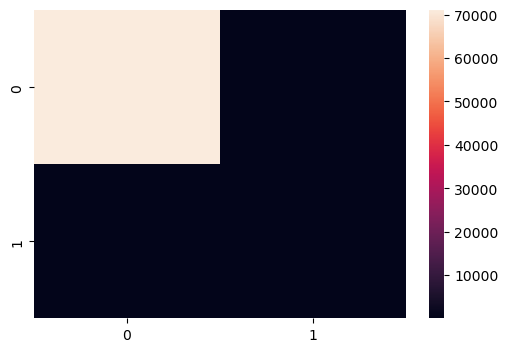

In [9]:
# Accuracy
y_train_pred = clf.predict(X_rf)
print("Training accuracy: ", accuracy_score(y_rf, y_train_pred))
y_test_pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Interpretation: value on the first row, second column is the number of examples that are not fraud
# but classified as fraud.
# The second row, first column is the number that are fraud but classified as not fraud.

# Visualize the confusion matrix.
plt.rcParams["figure.figsize"]=(6,4)
sns.heatmap(cm)

## SVC

In [51]:
# SVC model
from sklearn.svm import SVC

svc_clf = SVC(kernel='linear')
svc_clf.fit(X_rf,y_rf)
y_pred = svc_clf.predict(X_test)
print(accuracy_score(y_pred, y_test.values))
print("F1: ",f1_score(y_pred, y_test.values))

cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9783713940619646
F1:  0.12300683371298406
[[69554  1525]
 [   15   108]]


## Lazy Classifier

In [11]:
# Lazy Classifier
from lazypredict.Supervised import LazyClassifier

In [12]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
model, predictions = clf.fit(X_lazy, X_test, y_lazy, y_test)
model

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:11<00:00,  2.55it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.98,0.94,0.94,0.99,0.08
QuadraticDiscriminantAnalysis,0.94,0.93,0.93,0.97,0.11
XGBClassifier,0.96,0.93,0.93,0.98,0.16
LinearSVC,0.97,0.93,0.93,0.98,0.08
CalibratedClassifierCV,0.99,0.93,0.93,0.99,0.19
LogisticRegression,0.98,0.93,0.93,0.99,0.08
LGBMClassifier,0.97,0.93,0.93,0.98,0.25
PassiveAggressiveClassifier,0.97,0.92,0.92,0.98,0.07
SVC,0.98,0.92,0.92,0.99,1.36


## Calibrated Classifier

In [41]:
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)

calibrated_clf = CalibratedClassifierCV(base_clf,cv="prefit")
calibrated_clf.fit(X_train,y_train)

CalibratedClassifierCV(cv='prefit', estimator=GaussianNB())

In [76]:
y_pred = calibrated_clf.predict_proba(X_test)[:,1]
# Trial and error indicates that 5% is roughly the best probability cutoff for the f-score.
# However, the f-score will be low no matter what.
y_pred_adj = [0 if y_pred[i]<0.05 else 1 for i in range(len(y_pred))]

print("Accuracy: ",accuracy_score(y_pred_adj, y_test.values))
print("F1: ",f1_score(y_test, y_pred_adj))

cm = confusion_matrix(y_test, y_pred_adj)
print(cm)

# There are many false positives, in that most transactions flagged as fradulent are actually OK.
# In other words, precision is very low.
print(precision_recall_fscore_support(y_test,y_pred_adj))

Accuracy:  0.9794106907109351
F1:  0.11686746987951807
[[69639  1440]
 [   26    97]]
(array([0.99962679, 0.06310995]), array([0.97974085, 0.78861789]), array([0.98958393, 0.11686747]), array([71079,   123], dtype=int64))


In [74]:
precision_recall_fscore_support(y_test,y_pred_adj)

(array([0.99962679, 0.06310995]),
 array([0.97974085, 0.78861789]),
 array([0.98958393, 0.11686747]),
 array([71079,   123], dtype=int64))